# Decision Trees
"kyphosis is a kind of a backbone disease, and it is usually happens with backbone ,in that backbone there is a some infection. at that time those kind of diseses are present at this particular dataset says, that after the operation of getting treated from this particular kyphosis symptom after how many days the checkup was done and, we found out whether the KYPHOSIS was absent or present in those particular Patients"
column1:Age basically says that after the operation after 71 days again the recheck was done and it was findout whether the person was not having Kyphosis,so it was absent
column2:similarly number you will see that number basically represents that on which backbone of "spinalcot" operation was being done,,these are details of the particular dataset
# import libraries

In [5]:
import pandas as pd # pandas is basically used for reading the dataset
import numpy as np # numpy will be used for  creating multi-dimensional arrays
import matplotlib.pyplot as plt # it is used for visualization but it old
import seaborn as sns # it is also used for visualization but a lot of statistical concepts inside it
%matplotlib inline

# Get data

In [6]:
pwd

'C:\\Users\\User\\Documents\\Python_EDA'

In [16]:
df =pd.read_csv("kyphosis.csv")

In [17]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [18]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# EDA
simple pairplot for small dataset

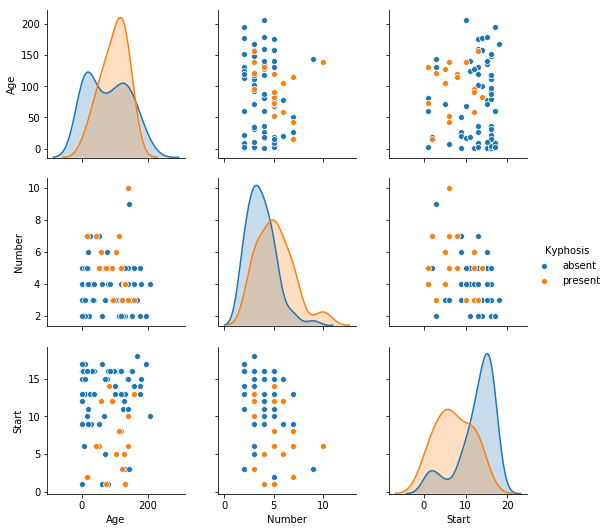

In [26]:
sns.pairplot(df, hue='Kyphosis')

# Train Test Split
let's split up the data into a training set and a test set

In [31]:
from sklearn.model_selection import train_test_split



In [37]:
x=df.drop('Kyphosis',axis=1)#drop the kyphosis column into the dataset #and remaing columns iam keeping it as x value#so it is my independent feauture
y=df['Kyphosis']# y column that becomes with independent feauture

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)#test size will be 30% so that's why we set 0.30
#basically this means that my training dataset size will be 70% of size of the total dataset#whereas my test size will be 30%

# Decesion Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
dtree=DecisionTreeClassifier(criterion='entropy')#2 types of criterion 1.entropy,2.Gini co efficient
#By defauly if you don't supply any criterion that it becomes Gini co efficient

In [41]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction and Evaluation

In [43]:
predictions=dtree.predict(x_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [46]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [47]:
conf_matrix

array([[17,  2],
       [ 1,  5]], dtype=int64)

In [48]:
accuracy

0.88

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.89      0.92        19
     present       0.71      0.83      0.77         6

   micro avg       0.88      0.88      0.88        25
   macro avg       0.83      0.86      0.84        25
weighted avg       0.89      0.88      0.88        25



In [50]:
print(confusion_matrix(y_test,predictions))

[[17  2]
 [ 1  5]]


# Tree Visualization
 scikit learn actually has some bulit in visualization capabilites for decision trees,you wont use this often and it requires and you to install the pydot library,but here is an example of what it look like and the code to execute this

In [87]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from graphviz import Graph
g=Graph(format='png')

features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

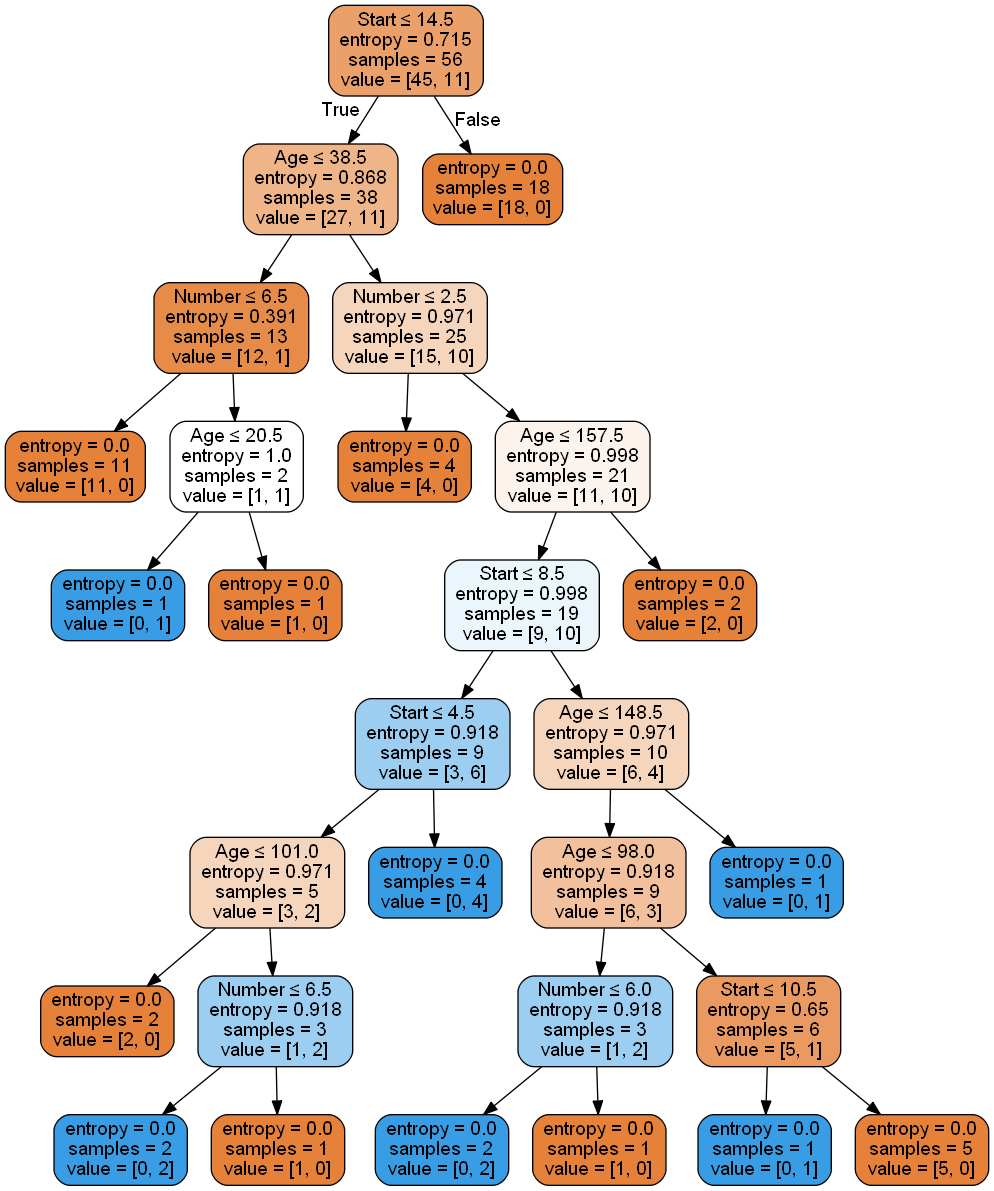

In [90]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,special_characters=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())